## Innomatics Internship APR 21
### Week 6 - Task - 11
###### AUTHOR : MOHIT KUMAR
###### EMAIL : mohitkrs848@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Description of Dataset
The Dataset The Census Income dataset has 48,842 entries.Each entry contains the following information about an individual:
- age : greater than 0
- workclass : represent the employment status of an individual
- fnlwgt: final weight.
- education : highest level of education achieved by an individual.
- education-num : the highest level of education achieved in numerical form
- marital-status: marital status of an individual.
- occupation :type of occupation of an individua
- relationship : what this individual is relative to others
- race : individual’s race
-  sex : the biological sex of the individual
- capital-gain :  capital gains for an individual
- capital-loss : capital loss for an individual
- hours-per-week : the hours an individual has reported to work per week
- native-country: country of origin for an individual
- Income: whether or not an individual makes more than $50,000 annually. 

### Objective
- To import the data and extract basic information
- To perform univariate and bivariate analysis and take down observations
- Find and treat the outliers and missing values in each column
- Perform feature transformation
- Build various Machine Learning models considering ‘income’ as target variable.
- Create a table to compare the performance of each of the ML Model.
- To test the data based on research questions
- Make conclusions based on observations

In [2]:
df = pd.read_csv("Datasets/Innomatics/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Skewness 
df.skew()

age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital-gain       11.894659
capital-loss        4.569809
hours-per-week      0.238750
dtype: float64

In [7]:
#Kurtosis
df.kurtosis()

age                 -0.184269
fnlwgt               6.057848
educational-num      0.625745
capital-gain       152.693096
capital-loss        20.014346
hours-per-week       2.951059
dtype: float64

In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df = df.replace("?",np.nan)

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


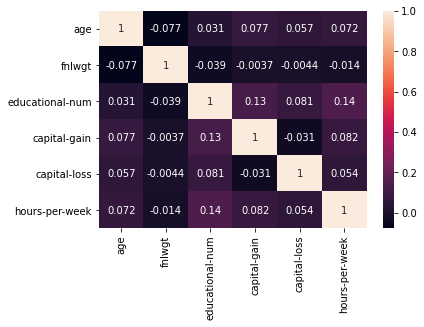

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.cov()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,187.978083,-1.109486e+05,1.090628,7.890565e+03,314.637298,12.157262
fnlwgt,-110948.649105,1.115221e+10,-10523.722187,-2.916791e+06,-185818.540554,-17690.405781
educational-num,1.090628,-1.052372e+04,6.609901,2.397673e+03,83.896136,4.577651
capital-gain,7890.565001,-2.916791e+06,2397.673247,5.553259e+07,-94422.847037,7586.507972
capital-loss,314.637298,-1.858185e+05,83.896136,-9.442285e+04,162412.669033,271.998838
hours-per-week,12.157262,-1.769041e+04,4.577651,7.586508e+03,271.998838,153.547885


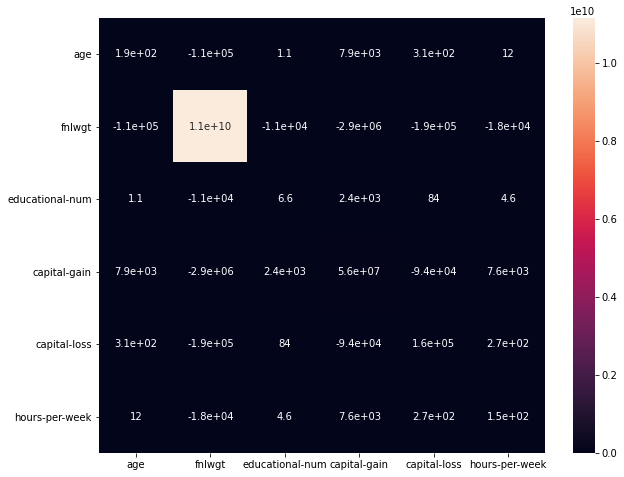

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.cov(),annot=True)

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Univariate Analysis

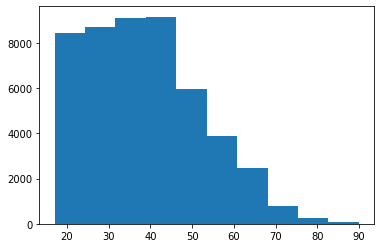

In [16]:
plt.hist(df["age"])
plt.show()

Observation : There are more people of age around 40.

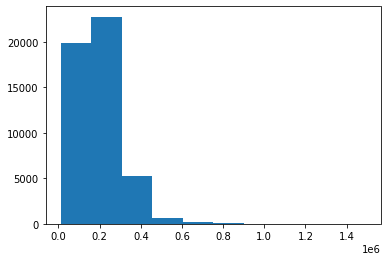

In [17]:
plt.hist(df["fnlwgt"])
plt.show()

Observation : More final-weight is around 0.2.

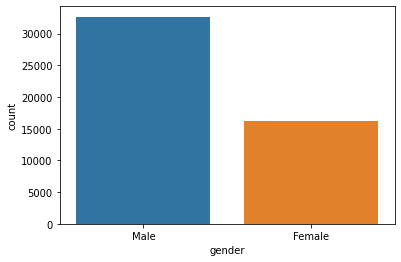

In [18]:
sns.countplot(df["gender"])
plt.show()

Obs : Male employees is nearly double than the female employees.

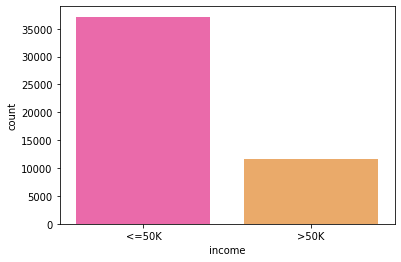

In [19]:
sns.countplot(df["income"],palette = "spring")

Obs : No. of emplyees having income more than 50K are very less compared to people having income greater than or equal to 50K.

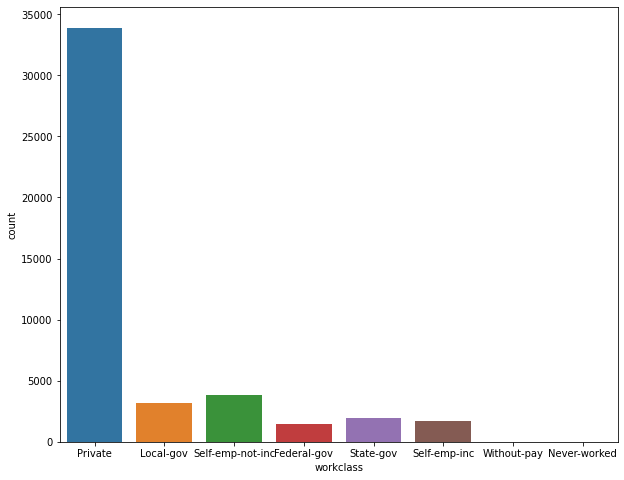

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(df["workclass"])
plt.show()

Obs : people having workclass private are really high in numbers.

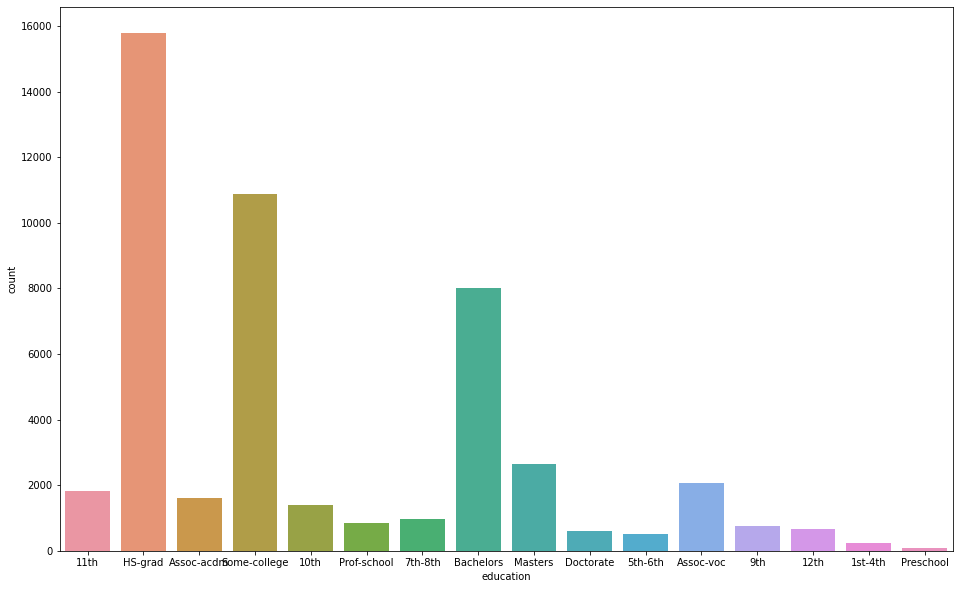

In [21]:
plt.figure(figsize=(16,10))
sns.countplot(df["education"])

Obs : More people have HS-grad education

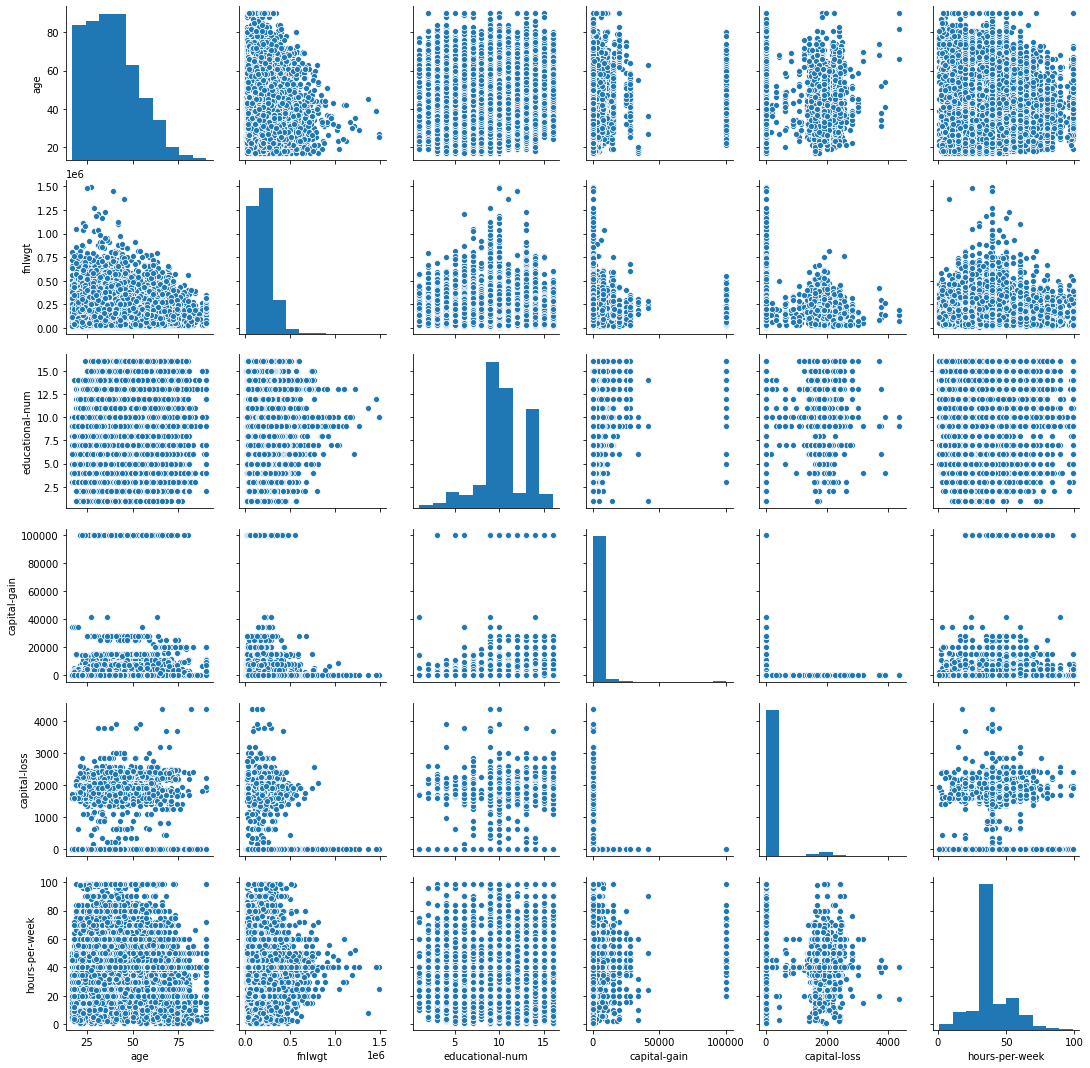

In [22]:
sns.pairplot(df)

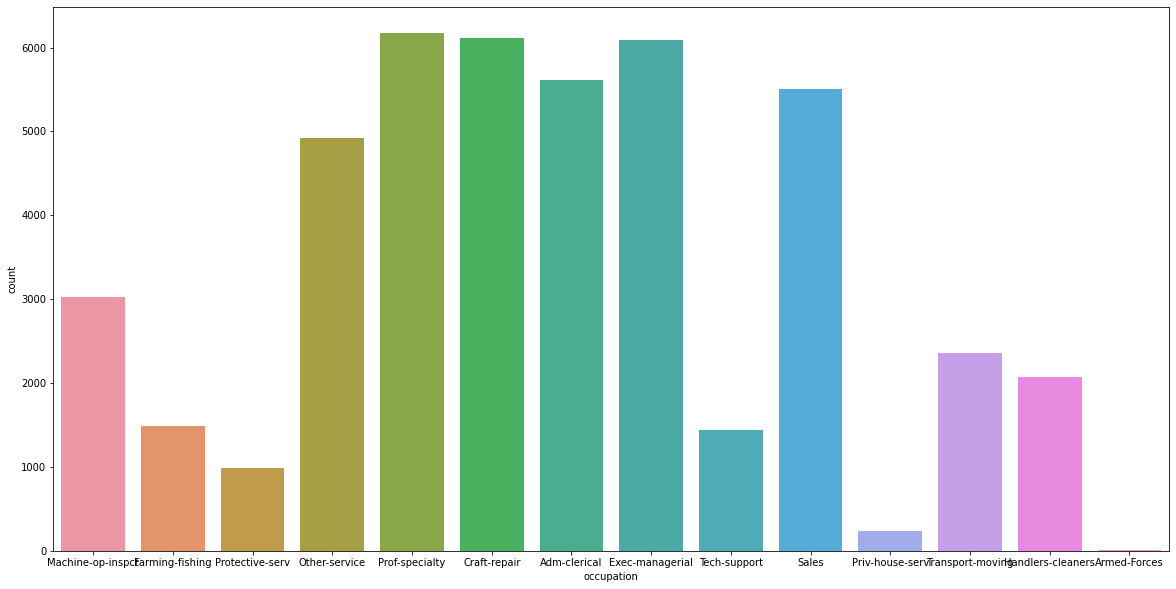

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df["occupation"])

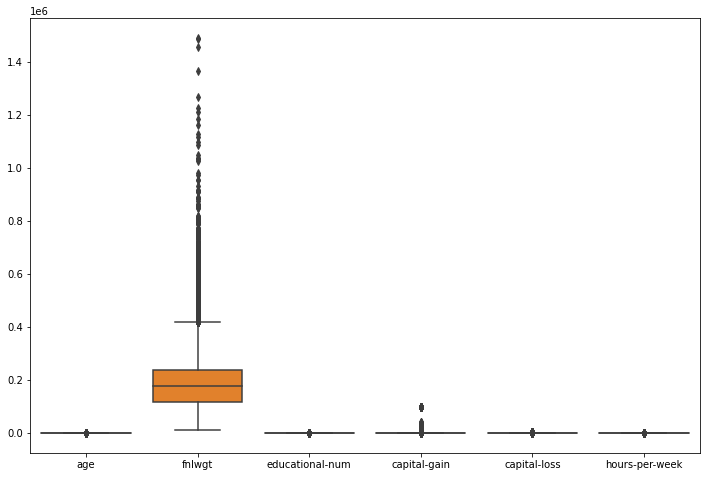

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

Obs : There are many putliers present in fnlwgt column having median around 0.3.

### Bivariate Analysis

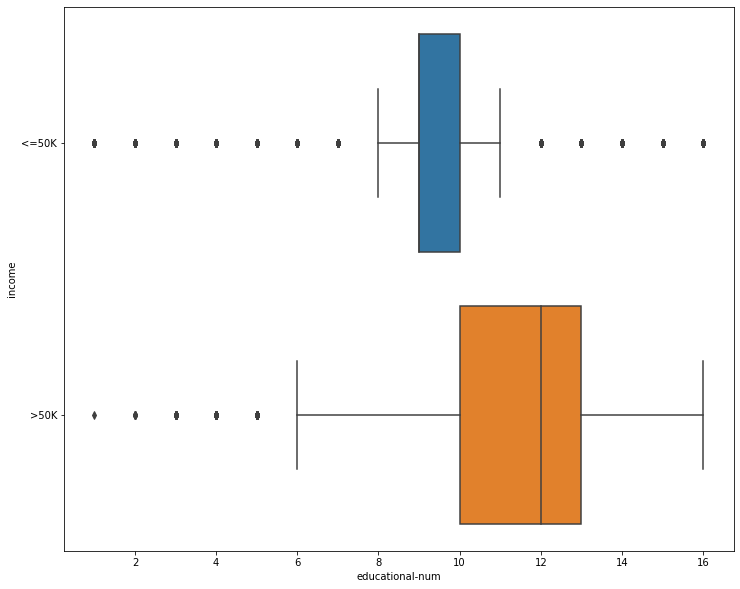

In [25]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df["educational-num"],y=df["income"])
plt.show()

Obs ; people with edu. num median 10 for income>50k and more people with edu. num 9 have income<50k.

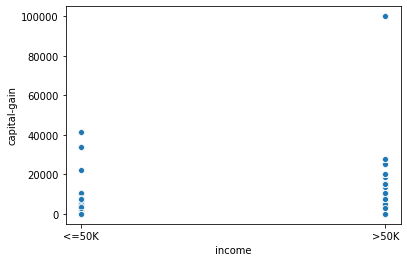

In [26]:
sns.scatterplot(x=df["income"],y=df["capital-gain"])

Obs : Capital-gain is more around 0-20k group.

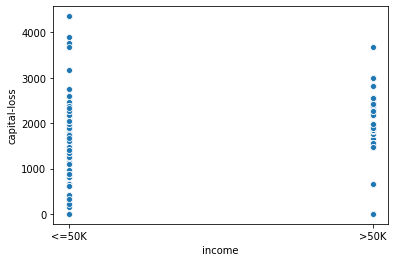

In [27]:
sns.scatterplot(x=df["income"],y=df["capital-loss"])

Obs : People having less than 50k income have capital loss of around 0-3k and for people having income more than 50k have capital loss of around 1.5-3k.

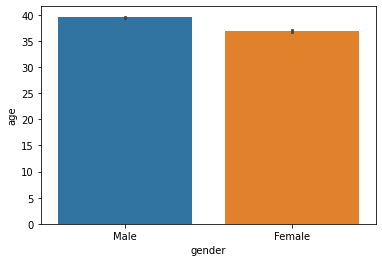

In [28]:
sns.barplot(x =df["gender"],y =df["age"])
plt.show()

Obs : Age count for male is greater than female.

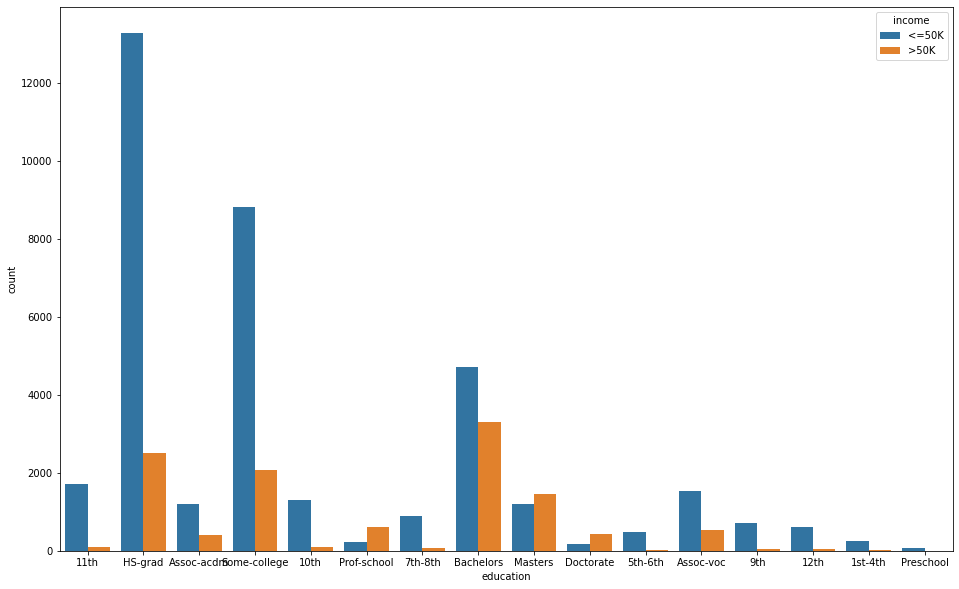

In [29]:
plt.figure(figsize=(16,10))
sns.countplot(x = df["education"],hue=df["income"])
plt.show()

Obs : Shows the relation between education and income of emloyee.

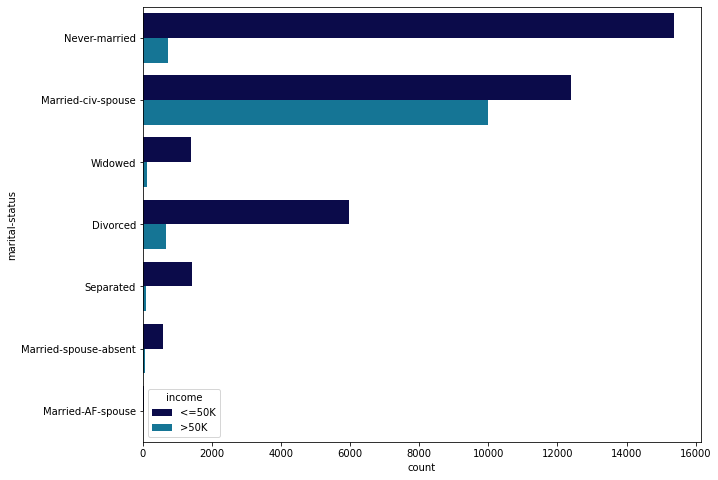

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(y=df["marital-status"],hue=df["income"],palette="ocean")
plt.show()

Obs : Most of the married-civ-spouse has income more than >50k and in every status the no. of people with income <=50k are more than others.

### Outlier Treatment

In [31]:
#find outliers
out=[]
def iqr_out(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print('lower limit:',Lower_tail)
    print('upper limit:',Upper_tail)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
#remove outliers
def drop_out(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [32]:
#Age Outliers
age_out=iqr_out(df['age'])

lower limit: -2.0
upper limit: 78.0
Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


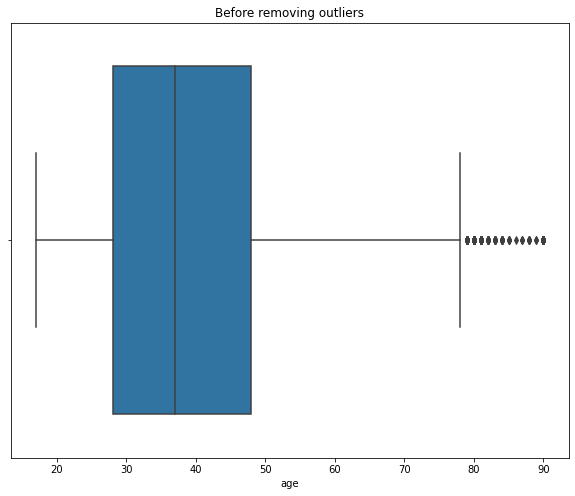

In [33]:
plt.figure(figsize=(10,8))
plt.title("Before removing outliers")
sns.boxplot(df["age"])
plt.show()

In [34]:
drop_out(df, 'age')

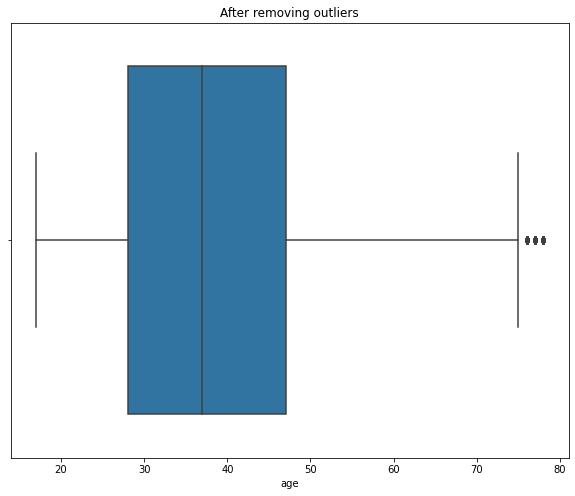

In [35]:
plt.figure(figsize=(10,8))
plt.title("After removing outliers")
sns.boxplot(df["age"])
plt.show()

In [36]:
#fnlwgt Outliers
fnlwgt_out = iqr_out(df["fnlwgt"])

lower limit: -62701.5
upper limit: 418118.5
Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81, 444554, 432824, 465326, 445382, 479296, 428420, 456736, 537222, 513100, 447488, 5

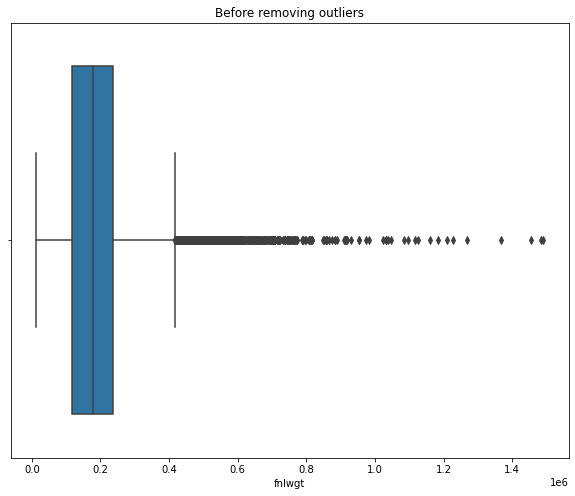

In [37]:
plt.figure(figsize=(10,8))
plt.title("Before removing outliers")
sns.boxplot(df["fnlwgt"])
plt.show()

In [38]:
drop_out(df, 'fnlwgt')

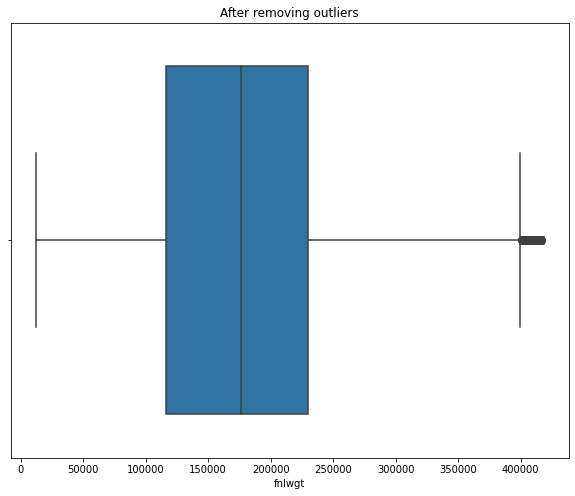

In [39]:
plt.figure(figsize=(10,8))
plt.title("After removing outliers")
sns.boxplot(df["fnlwgt"])
plt.show()

In [40]:
#capital-gain Outliers
cap_gain_out = iqr_out(df["educational-num"])

lower limit: 4.5
upper limit: 16.5
Outliers: [79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81, 444554, 432824, 465326, 445382, 479296, 428420, 456736, 537222, 513100, 447488, 512864, 50

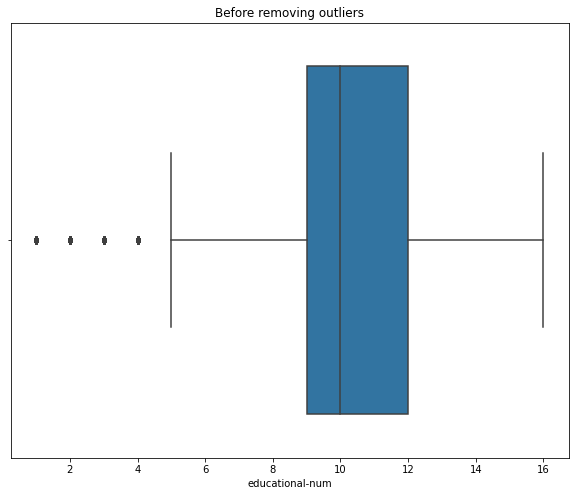

In [41]:
plt.figure(figsize=(10,8))
plt.title("Before removing outliers")
sns.boxplot(df["educational-num"])
plt.show()

In [42]:
drop_out(df, "educational-num")

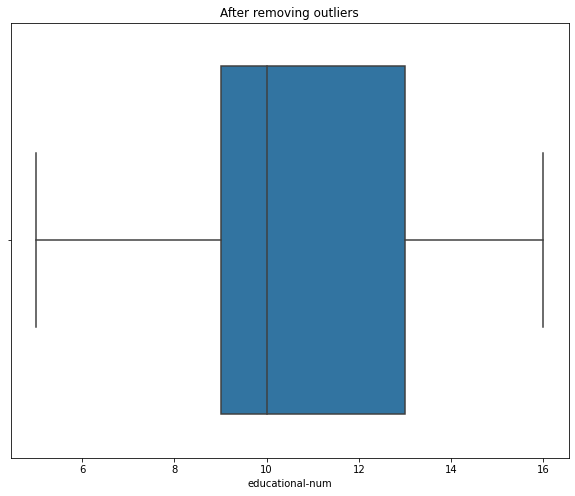

In [43]:
plt.figure(figsize=(10,8))
plt.title("After removing outliers")
sns.boxplot(df["educational-num"])
plt.show()

### Preparing of Data

In [44]:
data = pd.get_dummies(df)
data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48838,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
48839,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48840,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [45]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [46]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: income_>50K, dtype: uint8

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=70)

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
Y_pred=model.predict(X_test)
Y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=uint8)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
#Confusion Matrix
confusion_matrix(Y_test,Y_pred)

array([[9941,  335],
       [2503,  873]], dtype=int64)

In [53]:
#Accuracy 
lgr_acc=accuracy_score(Y_test,Y_pred)
lgr_acc

0.7921183709346616

### KNN - K Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
Y_pred=knn.predict(X_test)

In [57]:
confusion_matrix(Y_test,Y_pred)

array([[9426,  850],
       [2260, 1116]], dtype=int64)

In [58]:
knn_acc=accuracy_score(Y_test,Y_pred)
knn_acc

0.7721945502490477

### Compare the performance of models

In [59]:
print("Accuracy of Logistic Regression Model : ",lgr_acc)
print("Accuracy of KNN Model : ",knn_acc)

Accuracy of Logistic Regression Model :  0.7921183709346616
Accuracy of KNN Model :  0.7721945502490477
